In [6]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.4 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.16 which is incompatible.


In [2]:
import os
import requests
from PIL import Image

In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [4]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00


In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI


from langchain_core.messages import HumanMessage, SystemMessage


from langchain.vectorstores import DocArrayInMemorySearch


from langchain_google_genai import GoogleGenerativeAIEmbeddings


from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate


from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader


from langchain_text_splitters import CharacterTextSplitter


from langchain_community.vectorstores import FAISS

In [8]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [42]:
def load_model(model_name):
  if model_name == "gemini-pro":
    llm = ChatGoogleGenerativeAI(model="gemini-pro",verbose=True) # Added Verbose to get better debugging information
  # Changed this condition to accommodate other model names
  elif model_name == "gemini-1.5-flash":
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",verbose=True) # Added Verbose to get better debugging information
  # Use gemini-1.5-flash for image processing instead of the deprecated model
  else:
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",verbose=True) # Changed to 'gemini-1.5-flash' # Added Verbose to get better debugging information

  return llm
# %%
model=load_model("gemini-1.5-flash")

In [22]:

model.invoke("Best idea for a stratup").content

'There\'s no single "best" startup idea, as success depends on many factors including market timing, execution, and team.  However,  I can offer some areas with strong potential, categorized for clarity:\n\n**High-Potential Areas with Examples:**\n\n* **AI-Powered Solutions:**  AI is transforming many industries.  Ideas could focus on:\n    * **AI-driven personalized learning platforms:**  Adaptive learning software tailored to individual student needs.\n    * **AI-powered customer service chatbots:**  Improving efficiency and customer satisfaction.\n    * **AI for healthcare diagnostics:**  Assisting doctors with faster and more accurate diagnoses.\n    * **AI-powered content creation tools:**  Generating marketing copy, articles, or even code.  (Be mindful of ethical implications and potential job displacement).\n\n* **Sustainability & Green Tech:**  Growing consumer and investor interest in environmentally friendly solutions:\n    * **Sustainable packaging alternatives:**  Developin

In [23]:

model(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is ostrich a animal?")
    ]
).content

'Yes'

In [24]:

def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image

In [25]:
image = get_image("https://i.pinimg.com/736x/64/e7/e3/64e7e391830ff54a23ad40b19c5717a7.jpg",
                  "car",
                  "jpg")

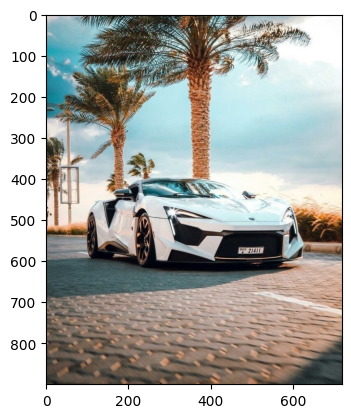

In [26]:
plt.imshow(image)
plt.show()

In [45]:
vision_model=load_model("gemini-pro-vision")


prompt="give me summary of this image in 5 words"

# Use the image URL instead of the Image object itself
image_url = "https://i.pinimg.com/736x/64/e7/e3/64e7e391830ff54a23ad40b19c5717a7.jpg"


message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url", "image_url": image_url # Pass the URL string
        }
    ]
)

In [28]:
print(vision_model.invoke([message]).content)

White supercar, palm trees, luxury drive.


In [46]:
!pip install pypdf
from langchain.document_loaders import PyPDFLoader # Import the PyPDFLoader class

loader = PyPDFLoader("/content/temp.pdf")
print(loader.load()[0].page_content)

Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗ ‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Exp

In [31]:
text=loader.load()[0].page_content

In [32]:

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs


In [33]:

docs = get_text_chunks_langchain(text)

In [34]:


embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [36]:
vectorstore = FAISS.from_documents(docs,embedding=embeddings)


retriever=vectorstore.as_retriever()

In [37]:
retriever.invoke("Who are the researchers in the paper")

[Document(id='96871415-fddb-4b42-bf87-d08ff8288f06', metadata={}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, t

In [47]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

llm_vision = load_model("gemini-pro-vision")

llm_text = load_model("gemini-1.0") # Changed from gemini-pro to gemini-1.0 to resolve model not found error


template = """
```
{context}
```
{query}

Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)

In [48]:
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

In [51]:
result = rag_chain.invoke("can you give me a detail of the paper?")

In [52]:
display(Markdown(result))

This document is a preprint of the paper "Attention Is All You Need" presented at NIPS 2017.  It introduces the Transformer, a novel neural network architecture for sequence transduction that relies solely on attention mechanisms, eliminating the need for recurrence and convolutions.  The authors demonstrate its superior performance and parallelizability on machine translation tasks (English-to-German and English-to-French), achieving state-of-the-art BLEU scores.  The paper also shows the Transformer's adaptability to English constituency parsing.


**Brief Information:**  The Transformer architecture is a groundbreaking approach to sequence transduction, significantly improving efficiency and performance over previous models.


**Location:** The paper is available on arXiv (arXiv:1706.03762v7).  The provided text is a snippet of the paper, likely from a PDF or similar document storage.

In [53]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7cc43d593c90>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n{query}\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7cc43cbcfa50>, default_metadata=())
| StrOutputParser()

In [54]:

full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

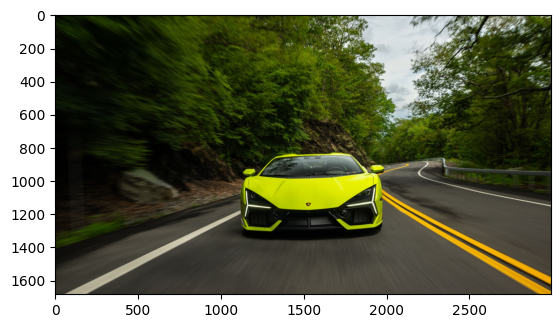

In [62]:

url_1 = "https://media.architecturaldigest.com/photos/66a914f1a958d12e0cc94a8e/16:9/w_2992,h_1683,c_limit/DSC_5903.jpg"


image = get_image(url_1, "car", "jpg")


plt.imshow(image)
plt.show()

In [ ]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given image.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_1}, # Use url_1 instead of image
    ]
)

result = full_chain.invoke([message])

display(Markdown(result))